Classes: ['acne', 'eksim', 'herpes', 'panu', 'rosacea']
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


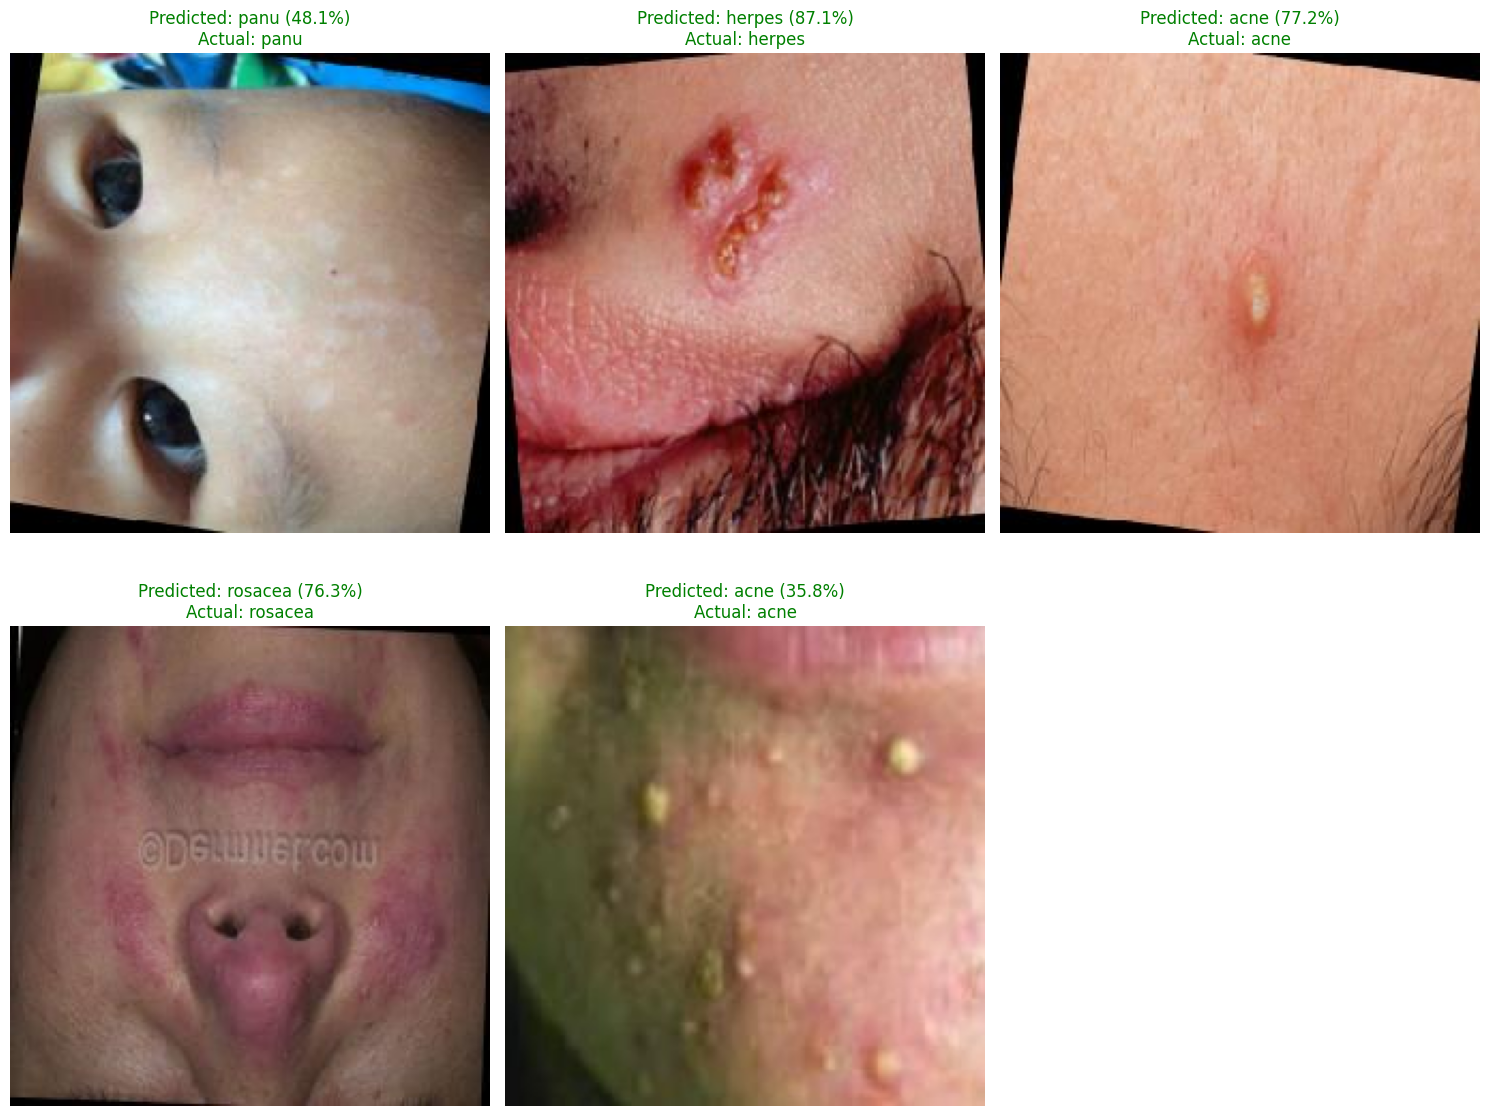

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Accuracy on sampled images: 1.00 (5/5)

Detailed Results:
1. ✓ Image: pa81_jpeg.rf.19ad11c3798373ba3e76790a29337e7c.jpg
   Predicted: panu (48.1%)
   Actual: panu
2. ✓ Image: he78_png.rf.4e06510d35db90b22f5ebb3055aa4a8f.jpg
   Predicted: herpes (87.1%)
   Actual: herpes
3. ✓ Image: ac93_JPG.rf.8a362f5965cc42d32787e5453081adba.jpg
   Predicted: acne (77.2%)
   Actual: acne
4. ✓ Image: ro78_jpg.rf.56ba99c38f539a85c6e5059cffcaf9a4.jpg
   Predicted: rosacea (76.3%)
   Actual: rosacea
5. ✓ Image: ac100_JPG.rf.a41d4a786f2197b20cfa6372cc1625a5.jpg
   Predicted: acne (35.8%)
   Actual: acne


In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Set correct paths to your dataset
base_dir = '/content/drive/MyDrive/MINI_PROJECT'
data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Load the trained model
model_path = os.path.join(base_dir, 'skin_disease_model.h5')
model = load_model(model_path)

# Get class names from test directory
class_names = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])
print(f"Classes: {class_names}")

# Function to load and preprocess image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img, img_array

# Function to get random images from test directory
def get_random_test_images(num_images=5):
    all_images = []
    true_labels = []

    # Collect all image paths and their true labels
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(test_dir, class_name)
        image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir)
                      if os.path.isfile(os.path.join(class_dir, f)) and
                      f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        for img_path in image_files:
            all_images.append(img_path)
            true_labels.append(class_idx)

    # Randomly select images
    if len(all_images) > num_images:
        selected_indices = random.sample(range(len(all_images)), num_images)
    else:
        selected_indices = range(len(all_images))
        print(f"Warning: Only {len(all_images)} test images available")

    selected_images = [all_images[i] for i in selected_indices]
    selected_labels = [true_labels[i] for i in selected_indices]

    return selected_images, selected_labels

# Get random test images
num_test_images = 5
test_image_paths, true_labels = get_random_test_images(num_test_images)

# Plot the images with predictions
plt.figure(figsize=(15, 12))

for i, (img_path, true_label) in enumerate(zip(test_image_paths, true_labels)):
    # Load and preprocess image
    display_img, preprocessed_img = load_and_preprocess_image(img_path)

    # Predict class
    predictions = model.predict(preprocessed_img)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_idx]
    true_class = class_names[true_label]

    # Calculate confidence
    confidence = predictions[0][predicted_class_idx] * 100

    # Create subplot
    plt.subplot(2, 3, i+1)
    plt.imshow(display_img)

    # Set title with prediction and ground truth
    title = f"Predicted: {predicted_class} ({confidence:.1f}%)\nActual: {true_class}"

    # Set title color based on correctness
    color = 'green' if predicted_class == true_class else 'red'
    plt.title(title, color=color)

    plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate and print accuracy on these samples
correct = sum(1 for i, true_label in enumerate(true_labels) if class_names[true_label] == class_names[np.argmax(model.predict(load_and_preprocess_image(test_image_paths[i])[1])[0])])
print(f"Accuracy on sampled images: {correct/len(true_labels):.2f} ({correct}/{len(true_labels)})")

# Print detailed results
print("\nDetailed Results:")
for i, (img_path, true_label) in enumerate(zip(test_image_paths, true_labels)):
    display_img, preprocessed_img = load_and_preprocess_image(img_path)
    predictions = model.predict(preprocessed_img, verbose=0)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_idx]
    true_class = class_names[true_label]
    confidence = predictions[0][predicted_class_idx] * 100

    status = "✓" if predicted_class == true_class else "✗"
    print(f"{i+1}. {status} Image: {os.path.basename(img_path)}")
    print(f"   Predicted: {predicted_class} ({confidence:.1f}%)")
    print(f"   Actual: {true_class}")